In [1]:
# random forest regressor on 20m resolution images

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import math

In [2]:
df = pd.read_csv(r"./dataset-Icheon&CHL/2000_20m_final_20221106.csv", low_memory = False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             279 non-null    int64  
 1   xcoord(long)   279 non-null    float64
 2   ycoord(lat)    279 non-null    float64
 3   sampling date  279 non-null    object 
 4   sensing date   279 non-null    object 
 5   B2             279 non-null    int64  
 6   B3             279 non-null    int64  
 7   B4             279 non-null    int64  
 8   B5             279 non-null    int64  
 9   B6             279 non-null    int64  
 10  B7             279 non-null    int64  
 11  B8A            279 non-null    int64  
 12  B11            279 non-null    int64  
 13  B12            279 non-null    int64  
 14  NDVI           279 non-null    float64
 15  BSI            279 non-null    float64
 16  EVI            279 non-null    float64
 17  AVI            279 non-null    float64
 18  SAVI      

In [4]:
df = pd.DataFrame(df[['B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','EVI','AVI','SAVI','NDMI','SOC']])

In [5]:
df.head()

,B2,B3,B4,B5,B6,B7,B8A,B11,B12,NDVI,BSI,EVI,AVI,SAVI,NDMI,SOC
0,2020,2555,3095,3264,3774,4137,4234,5107,4041,0.155410,0.134754,0.371979,-2461.869129,0.221913,-0.093459,0.71
1,1640,2002,2397,2781,3036,3232,3188,3986,3095,0.141629,0.138703,0.375166,-1821.351929,0.202231,-0.111235,0.71
2,1929,2325,2793,3124,3434,3429,3635,4849,3928,0.130989,0.157353,0.355184,-2044.453828,0.187040,-0.143093,0.71
3,2387,2955,3646,3441,4298,4607,4869,5624,4324,0.143629,0.121869,0.345734,-2789.467172,0.205092,-0.071953,0.71
4,3075,3914,4958,5340,5515,5755,5967,6441,4969,0.092357,0.115307,0.199352,-3101.858919,0.131881,-0.038201,0.86


In [6]:
# # normalize1
# # band 값만 10000으로 나누기
# df['B2'] = df['B2']/10000
# df['B3'] = df['B3']/10000
# df['B4'] = df['B4']/10000
# df['B5'] = df['B5']/10000
# df['B6'] = df['B6']/10000
# df['B7'] = df['B7']/10000
# df['B8A'] = df['B8A']/10000
# df['B11'] = df['B11']/10000
# df['B12'] = df['B12']/10000


In [7]:
# df['AVI'] = df['AVI']/10000
# print(df)

In [8]:
x = df.iloc[:, :-1]
print(x)

       B2    B3    B4    B5    B6    B7   B8A   B11   B12      NDVI       BSI  \
0    2020  2555  3095  3264  3774  4137  4234  5107  4041  0.155410  0.134754   
1    1640  2002  2397  2781  3036  3232  3188  3986  3095  0.141629  0.138703   
2    1929  2325  2793  3124  3434  3429  3635  4849  3928  0.130989  0.157353   
3    2387  2955  3646  3441  4298  4607  4869  5624  4324  0.143629  0.121869   
4    3075  3914  4958  5340  5515  5755  5967  6441  4969  0.092357  0.115307   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...       ...       ...   
274  2027  2407  2756  3122  3377  3449  3649  4283  3924  0.139422  0.107196   
275  1895  2369  2891  3165  3277  3394  3603  4378  3873  0.109640  0.138717   
276  1819  2208  2595  2881  3015  3146  3342  3940  3566  0.125821  0.117476   
277  2043  2483  2853  3178  3425  3555  3656  4255  3901  0.123368  0.110018   
278  1891  2344  2834  3052  3162  3352  3576  3887  3244  0.115757  0.102888   

          EVI          AVI 

In [9]:
y = df.iloc[:, -1:]

In [10]:
print(y)

      SOC
0    0.71
1    0.71
2    0.71
3    0.71
4    0.86
..    ...
274  3.22
275  3.30
276  3.30
277  3.30
278  2.51

[279 rows x 1 columns]


In [11]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25)

In [12]:
train_stats = pd.DataFrame(x_train).describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
0,209.0,2509.516746,461.291916,1640.000000,2194.000000,2459.000000,2766.000000,4953.000000
1,209.0,3174.129187,559.475740,1946.000000,2842.000000,3138.000000,3464.000000,5427.000000
2,209.0,3884.727273,650.632043,2129.000000,3539.000000,3806.000000,4236.000000,5950.000000
3,209.0,4309.636364,701.554258,2417.000000,3913.000000,4265.000000,4700.000000,6381.000000
4,209.0,4502.803828,709.036124,2404.000000,4115.000000,4478.000000,4877.000000,6370.000000
5,209.0,4659.990431,723.910933,2478.000000,4246.000000,4640.000000,5062.000000,6356.000000
6,209.0,4755.669856,718.796738,2636.000000,4380.000000,4741.000000,5161.000000,6447.000000
7,209.0,5823.588517,895.922233,3464.000000,5358.000000,5836.000000,6378.000000,8106.000000
8,209.0,4568.511962,648.622246,2599.000000,4127.000000,4632.000000,4969.000000,7006.000000
9,209.0,0.101916,0.024517,0.040090,0.083794,0.099607,0.118986,0.172052


In [27]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']

normed_train_data = norm(pd.DataFrame(x_train))
normed_test_data = norm(pd.DataFrame(x_test))

In [123]:
##########모델 생성
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

from keras.optimizers import SGD
opt = SGD(learning_rate=0.01)

def build_model(num_input=1):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=num_input))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='linear'))
    
    model.compile(optimizer=opt, loss='MSE', metrics=['accuracy'])
    
    return model

model = build_model(num_input=15)

# Dense : 각각의 신경망 층을 나타냄
# 맨 처음과 마지막이 입력층과 출력층, 그 사이는 은닉층
# 각 층 맨 앞의 숫자(128, 128, 1)는 해당 층의 노드 수임
# input_dim : 입력 데이터 특성 수(input_shape=(15,) 이렇게도 입력 가능)
# activation : 해당 층의 노드들이 사용할 활성화 함수 지정

In [124]:
# # keras 모델 초기화 후에는 compile 과정을 거쳐야 함
# opt = keras.optimizers.Adam(learning_rate=0.1)
# model.compile(optimizer=opt,
#               loss='mse',
#               metrics=['accuracy'])
# # optimizer : 손실 함수의 최소값을 찾는 방법 지정
# # loss : 손실 함수 종류 지정
# # metrics : 훈련 시 평가 지표 지정

In [125]:
pd.DataFrame(y_train).transpose()

,0,1,2,3,4,5,6,7,8,9,...,199,200,201,202,203,204,205,206,207,208
0,0.92,0.21,0.32,1.01,1.26,0.92,0.04,0.9,1.04,0.37,...,1.46,3.22,0.92,0.37,1.7,1.54,2.61,0.32,1.07,1.06


In [126]:
normed_test_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,-0.885593,-1.008318,-0.927909,-1.146934,-1.297259,-1.154825,-1.323976,-0.884662,-0.933536,-1.146050,1.271058,-0.933183,1.678320,-1.146085,-1.546445
1,4.167607,2.850652,1.855538,1.589847,1.239988,1.080257,0.965962,1.515100,3.175173,-2.771780,-1.784213,0.915687,0.938795,-2.771784,-1.472129
2,1.399295,1.469002,1.626530,1.619780,1.337303,1.422840,1.245596,1.661318,1.523981,-1.431059,0.995213,-1.137416,-0.520854,-1.431039,-1.111418
3,-0.458531,-0.708036,-0.826469,-0.914593,-0.922102,-0.935185,-0.821748,-0.568787,-0.282926,0.284551,0.077855,0.529780,0.672956,0.284528,-0.831323
4,-0.265595,-0.391669,-0.366916,-1.238160,-0.288848,-0.073200,0.157666,-0.222774,-0.376971,1.701364,-1.090010,1.176098,-0.745622,1.701383,1.163046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0.792304,0.852353,1.020965,0.958391,1.010098,0.954551,0.837970,0.407861,0.091714,-0.826215,-0.583556,-0.774464,-0.513811,-0.826193,1.162478
66,-1.063354,-1.029766,-0.983240,-0.807687,-0.875560,-0.965575,-0.870441,-0.275234,-0.484892,0.737601,1.731011,0.171237,0.594776,0.737574,-1.958910
67,0.519158,0.366184,0.021937,0.234285,0.300684,0.290104,0.473472,0.579751,1.047587,1.270854,-0.559541,1.586078,-0.972251,1.270883,-0.337320
68,0.135453,0.008706,-0.474504,-0.273160,-0.238075,-0.321850,-0.222135,-0.698262,-0.813281,0.934052,-2.141654,1.550011,-0.139149,0.934053,1.587587


In [127]:
pd.DataFrame(y_train)

,0
0,0.92
1,0.21
2,0.32
3,1.01
4,1.26
...,...
204,1.54
205,2.61
206,0.32
207,1.07


In [131]:
model.fit(
  normed_train_data, pd.DataFrame(y_train),
  epochs=500, verbose=2)

Epoch 1/500
7/7 - 0s - loss: 0.0535 - accuracy: 0.0526 - 41ms/epoch - 6ms/step
Epoch 2/500
7/7 - 0s - loss: 0.0536 - accuracy: 0.0526 - 39ms/epoch - 6ms/step
Epoch 3/500
7/7 - 0s - loss: 0.0536 - accuracy: 0.0526 - 38ms/epoch - 5ms/step
Epoch 4/500
7/7 - 0s - loss: 0.0537 - accuracy: 0.0526 - 44ms/epoch - 6ms/step
Epoch 5/500
7/7 - 0s - loss: 0.0534 - accuracy: 0.0526 - 36ms/epoch - 5ms/step
Epoch 6/500
7/7 - 0s - loss: 0.0535 - accuracy: 0.0526 - 36ms/epoch - 5ms/step
Epoch 7/500
7/7 - 0s - loss: 0.0533 - accuracy: 0.0526 - 37ms/epoch - 5ms/step
Epoch 8/500
7/7 - 0s - loss: 0.0533 - accuracy: 0.0526 - 34ms/epoch - 5ms/step
Epoch 9/500
7/7 - 0s - loss: 0.0532 - accuracy: 0.0526 - 36ms/epoch - 5ms/step
Epoch 10/500
7/7 - 0s - loss: 0.0533 - accuracy: 0.0526 - 36ms/epoch - 5ms/step
Epoch 11/500
7/7 - 0s - loss: 0.0534 - accuracy: 0.0526 - 48ms/epoch - 7ms/step
Epoch 12/500
7/7 - 0s - loss: 0.0535 - accuracy: 0.0526 - 35ms/epoch - 5ms/step
Epoch 13/500
7/7 - 0s - loss: 0.0533 - accuracy: 

Epoch 104/500
7/7 - 0s - loss: 0.0526 - accuracy: 0.0526 - 34ms/epoch - 5ms/step
Epoch 105/500
7/7 - 0s - loss: 0.0523 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 106/500
7/7 - 0s - loss: 0.0522 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 107/500
7/7 - 0s - loss: 0.0524 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 108/500
7/7 - 0s - loss: 0.0521 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 109/500
7/7 - 0s - loss: 0.0520 - accuracy: 0.0526 - 33ms/epoch - 5ms/step
Epoch 110/500
7/7 - 0s - loss: 0.0522 - accuracy: 0.0526 - 34ms/epoch - 5ms/step
Epoch 111/500
7/7 - 0s - loss: 0.0519 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 112/500
7/7 - 0s - loss: 0.0520 - accuracy: 0.0526 - 30ms/epoch - 4ms/step
Epoch 113/500
7/7 - 0s - loss: 0.0520 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 114/500
7/7 - 0s - loss: 0.0519 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 115/500
7/7 - 0s - loss: 0.0521 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 116/500
7/7 - 0s - los

7/7 - 0s - loss: 0.0511 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 206/500
7/7 - 0s - loss: 0.0510 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 207/500
7/7 - 0s - loss: 0.0510 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 208/500
7/7 - 0s - loss: 0.0509 - accuracy: 0.0526 - 33ms/epoch - 5ms/step
Epoch 209/500
7/7 - 0s - loss: 0.0510 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 210/500
7/7 - 0s - loss: 0.0509 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 211/500
7/7 - 0s - loss: 0.0508 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 212/500
7/7 - 0s - loss: 0.0511 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 213/500
7/7 - 0s - loss: 0.0508 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 214/500
7/7 - 0s - loss: 0.0509 - accuracy: 0.0526 - 30ms/epoch - 4ms/step
Epoch 215/500
7/7 - 0s - loss: 0.0508 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 216/500
7/7 - 0s - loss: 0.0509 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 217/500
7/7 - 0s - loss: 0.0509 - ac

Epoch 307/500
7/7 - 0s - loss: 0.0498 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 308/500
7/7 - 0s - loss: 0.0498 - accuracy: 0.0526 - 33ms/epoch - 5ms/step
Epoch 309/500
7/7 - 0s - loss: 0.0496 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 310/500
7/7 - 0s - loss: 0.0495 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 311/500
7/7 - 0s - loss: 0.0497 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 312/500
7/7 - 0s - loss: 0.0497 - accuracy: 0.0526 - 35ms/epoch - 5ms/step
Epoch 313/500
7/7 - 0s - loss: 0.0499 - accuracy: 0.0526 - 34ms/epoch - 5ms/step
Epoch 314/500
7/7 - 0s - loss: 0.0495 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 315/500
7/7 - 0s - loss: 0.0494 - accuracy: 0.0526 - 37ms/epoch - 5ms/step
Epoch 316/500
7/7 - 0s - loss: 0.0497 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 317/500
7/7 - 0s - loss: 0.0497 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 318/500
7/7 - 0s - loss: 0.0497 - accuracy: 0.0526 - 31ms/epoch - 4ms/step
Epoch 319/500
7/7 - 0s - los

7/7 - 0s - loss: 0.0487 - accuracy: 0.0526 - 34ms/epoch - 5ms/step
Epoch 409/500
7/7 - 0s - loss: 0.0487 - accuracy: 0.0526 - 85ms/epoch - 12ms/step
Epoch 410/500
7/7 - 0s - loss: 0.0485 - accuracy: 0.0526 - 37ms/epoch - 5ms/step
Epoch 411/500
7/7 - 0s - loss: 0.0485 - accuracy: 0.0526 - 40ms/epoch - 6ms/step
Epoch 412/500
7/7 - 0s - loss: 0.0484 - accuracy: 0.0526 - 42ms/epoch - 6ms/step
Epoch 413/500
7/7 - 0s - loss: 0.0485 - accuracy: 0.0526 - 37ms/epoch - 5ms/step
Epoch 414/500
7/7 - 0s - loss: 0.0485 - accuracy: 0.0526 - 39ms/epoch - 6ms/step
Epoch 415/500
7/7 - 0s - loss: 0.0484 - accuracy: 0.0526 - 36ms/epoch - 5ms/step
Epoch 416/500
7/7 - 0s - loss: 0.0486 - accuracy: 0.0526 - 37ms/epoch - 5ms/step
Epoch 417/500
7/7 - 0s - loss: 0.0486 - accuracy: 0.0526 - 35ms/epoch - 5ms/step
Epoch 418/500
7/7 - 0s - loss: 0.0486 - accuracy: 0.0526 - 32ms/epoch - 5ms/step
Epoch 419/500
7/7 - 0s - loss: 0.0483 - accuracy: 0.0526 - 34ms/epoch - 5ms/step
Epoch 420/500
7/7 - 0s - loss: 0.0485 - a

In [132]:
# 테스트셋을 통한 모델 평가
model.evaluate(normed_test_data, pd.DataFrame(y_test), verbose=2)
# verbose : 결과 출력의 단계 설정
# auto - 대부분 1로 지정됨
# 0 - 출력 없음
# 1 - 진행 상황 출력(프로그레스바 포함)
# 2 - 진행 상황 출력(프로그레스바 제외, 1에 비해 간소화)

3/3 - 0s - loss: 0.1335 - accuracy: 0.0571 - 55ms/epoch - 18ms/step


[0.13353075087070465, 0.05714285746216774]

9/9 [==============================] - 0s 2ms/step


2022-11-08 06:33:31.707975: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


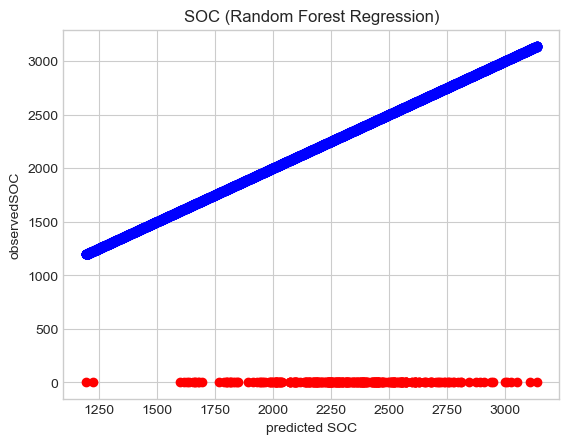

In [133]:
import matplotlib.pyplot as plt

# Predicted versus observed SOC
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
X_grid = np.linspace(math.floor(min(model.predict(x.values))), math.ceil(max(model.predict(x.values))),10000)  # X의 최소값부터 X의 최대값까지 0.01 단위로 값 채우기
#X_grid = X_grid.reshape((len(X_grid),1))  # n X 1 행렬로 변환
plt.scatter(model.predict(x.values), y.values, color='red')
plt.scatter(X_grid,X_grid, color='blue')

plt.title('SOC (Random Forest Regression)')
plt.xlabel('predicted SOC')
plt.ylabel('observedSOC')
plt.show()